## Introduction to Julia

Julia is a flexible dynamic language, appropriate for scientific and numerical computing, with performance comparable to traditional statically-typed languages. 

It comes with a full-featured interactive command-line REPL (read-eval-print loop).

In [1]:
# some arithmetic operations
(1+2)*4/25 - 0.2

0.27999999999999997

In [2]:
# Column vectors are entered in square brackets, components are separated by a semicolon.
# Addition is component-wise.
[1; 2] + [2; 3]

2-element Vector{Int64}:
 3
 5

In [3]:
# A matrix is entered in a similar manner. Note that the elements in each row are separated by a space.
# We assign the matrix on the right to the variable 'A'.
A = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [4]:
# a vector x ...
x = [-1; 1]

2-element Vector{Int64}:
 -1
  1

In [5]:
# The operation used by Julia depends on the type of the operands.
# In the example below the default is matrix multiplication.
b = A*x

2-element Vector{Int64}:
 1
 1

In [6]:
# To force component-wise operations place a dot (.) in front of the operator.
A.*x

2×2 Matrix{Int64}:
 -1  -2
  3   4

In [7]:
# Solving a linear system A*x = b is easy with the 'backslash operator' (left division).
A\b

2-element Vector{Float64}:
 -1.0
  1.0

In [8]:
# an example of list comprehension
vec = [10.0^i for i in 3:-1:-4]

8-element Vector{Float64}:
 1000.0
  100.0
   10.0
    1.0
    0.1
    0.010000000000000002
    0.001
    0.0001

In [9]:
# We can access an element from a vector/list with [...].
# Equality comparison is done with ==.
vec[6] == 0.01

false

In [10]:
# Due to rounding errors in floating point computations, floating point variables can slightly differ even though the were seemingly obtained in the same manner.
isapprox(vec[6], 0.01)

true

In [11]:
# Julia cannot do symbolic computations. However, Rationals, BigInts and BigFloats are supported.
# (Note that Big types require dynamic memory allocation, i.e., they are 'slow'.)
2//3+4//5, factorial(big(100))

(22//15, 93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000)

In [12]:
# a linear system with rational entries
A = [1//2 2; 3 2]
b = [3//4; 4]
A\b

2-element Vector{Rational{Int64}}:
 13//10
  1//20

In [13]:
# a BigFloat example
x = 1e-1
x^10000, big(x)^10000

(0.0, 1.000000000000555111512312732329199927286316705774142467385709861973837942134167e-10000)

## 2D Plots in Julia

To draw plots the package Plots is required. We load it via `using Plots` in the Julia REPL.

In [14]:
using Plots

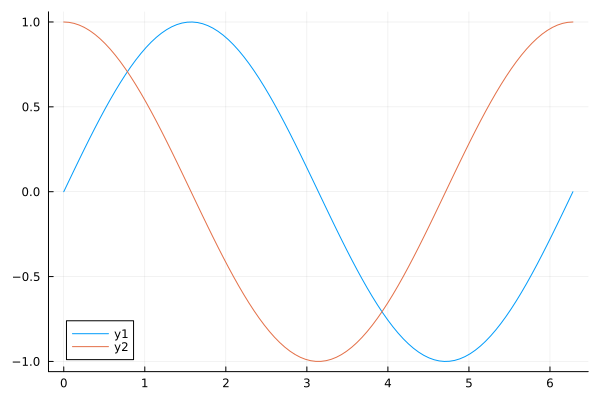

In [15]:
# There are several ways to use the "plot" function. The most basic use is: "plot(x, [y1, y2, ..., yn]), where x is a vector of x-coordinates
# and yi  are vectors of y-coordinates.

x = LinRange(0, 2*pi, 100) # a vector of 100 evenly spaced values between 0 and 2π.
y1 = sin.(x) # the dot (.) forces componen-wise evaluation
y2 = cos.(x)
plot(x, [y1, y2])

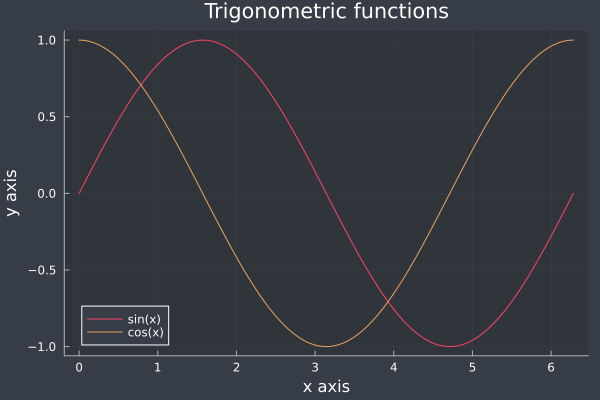

In [16]:
# we can add all sorts of ornaments to a plot
theme(:dark)
plot(x, [sin.(x), cos.(x)]; title = "Trigonometric functions", label = ["sin(x)" "cos(x)"], xlabel = "x axis", ylabel = "y axis")

In [17]:
# a plot of 1/(1+x) and 1/(1+x)*sin(e^x) with labels saved to "plot.pdf"
using LaTeXStrings
#
# YOUR CODE HERE
#

## Solving systems of linear equations with Julia (and LinearAlgebra package)

Below we'll show some basic examples for solving linear systems written in matrix form $$A\mathbf{x} = \mathbf{b}.$$

In [18]:
# first, load the package 
using LinearAlgebra

**Linear least squares method.** Let $A \in \mathbb{R}^{m \times n}$ be an $m\times n$ matrix with $m \ge n$. Let $\mathbf{b} \in \mathbb{R}^m$ be a vector. How would you find the orthogonal projection of $\mathbf{b}$ onto the column space of $A$, $C(A)$? (Assume that the columns of $A$ are linearly independent.)

**Task:** We want to approximate a real function $f$ on the interval $[a,b]$ with a polynomial. We will do this (perhaps naïvely) by dividing the interval $[a,b]$ with $k+1$ equidistant points $a = x_0, x_1, \ldots, x_k = b$ and then find the coefficients of the polynomial $p(x)$ that is the best fit to the data in the table below according to the linear least squares method.

| $x_0$ | $x_1$ | $\cdots$ | $x_i$ | $\cdots$ | $x_k$ |
|:-----:|:-----:|:--------:|:-----:|:--------:|:-----:|
| $f(x_0)$ | $f(x_1)$ | $\cdots$ | $f(x_i)$ | $\cdots$ | $f(x_k)$ |

* Let $p(x) = a_n x^n + a_{n-1}x^{n-1} + \cdots +a_1 x + a_0$ be a polynomial of degree $n$. Write the matrix $A$ of the corresponding linear system and the right-hand side $\mathbb{b}$ according to the data in the table above.

* Find the approximations of orders $0$, $1$ and $2$ for the function $f(x) = \frac{x^2}{1+x^2}$ on the interval $[-1,1]$ using the points $x_0 = -1$, $x_1 = 0$ and $x_2 = 1$.

* Using __Julia__ approximate the function $g(x) = \frac{1}{1+25x^2}$ on  $[-1,1]$ with polynomials of order $0,2,\ldots,20$, dividing the interval $[-1,1]$ with $21$ equidistant points. Find the approximations for the exact data and for data with (artificially added) errors. Using the `plot` command plot the graphs of the original functions and all the approximations. 

In [19]:
#
# YOUR CODE HERE ...
#
b = [1/2 ; 0 ; 1/2]

A0 = [1; 1; 1]
x0 = A0\b
println(x0)

A1 = [-1 1; 0 1; 1 1]
x1 = A1\b
println(x1)

A2 = [1 -1 1; 0 0 1; 1 1 1]
x2 = A2\b
println(x2)

0.3333333333333333
[3.925231146709438e-17, 0.3333333333333333]
[0.5, 0.0, 0.0]


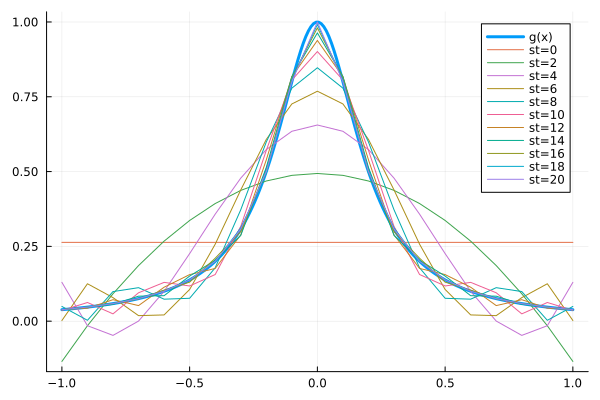

"/home/boobsson/Desktop/3. letnik FRI/MM/plt.pdf"

In [1]:
#
# ... AND HERE ...
#

using Plots

stopnje = collect(0:2:20)
interval = LinRange(-1, 1, 21)
tocke = LinRange(-1, 1, 200)
g(x) = 1 / (1 + 25*x^2)

DesnaStran = zeros(21)
for (j, x) in enumerate(interval)
    DesnaStran[j] = g(x)
end

plt = plot(tocke, g.(tocke), label="g(x)", linewidth=3)

for st in stopnje
    A = zeros(21, st+1)

    for (j, y) in enumerate(interval)
        for i = 1:(st+1)
            A[j, i] = y^(i-1)
        end
    end

    koef = A \ DesnaStran

    p = zeros(length(interval))

    for (j, y) in enumerate(interval)
        for i in 1:length(koef)
            p[j] += koef[i] * y^(i-1)
        end
    end

    plot!(plt, interval, p, label="st=$st")
end

display(plt)
savefig(plt, "plt.pdf")